<a href="https://colab.research.google.com/github/DuplamenteH/DeepLearning/blob/main/modern_computer_vision_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seção 1

# Cap 01



Feedforward propagation é o básico das redes neurais a imagem a seguir mostra como é calculado o mesmo.
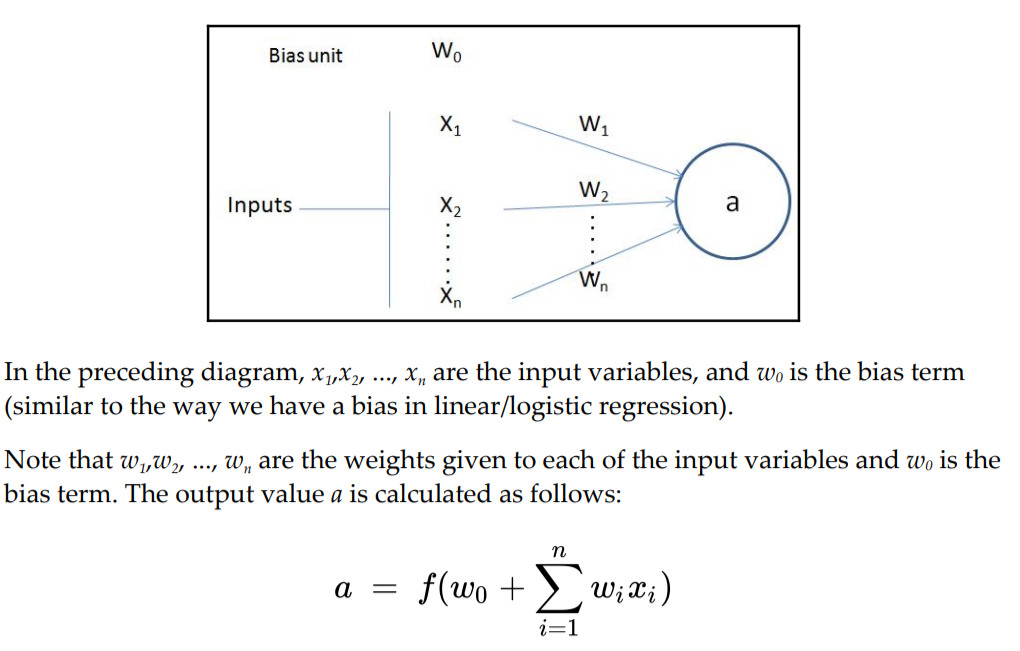

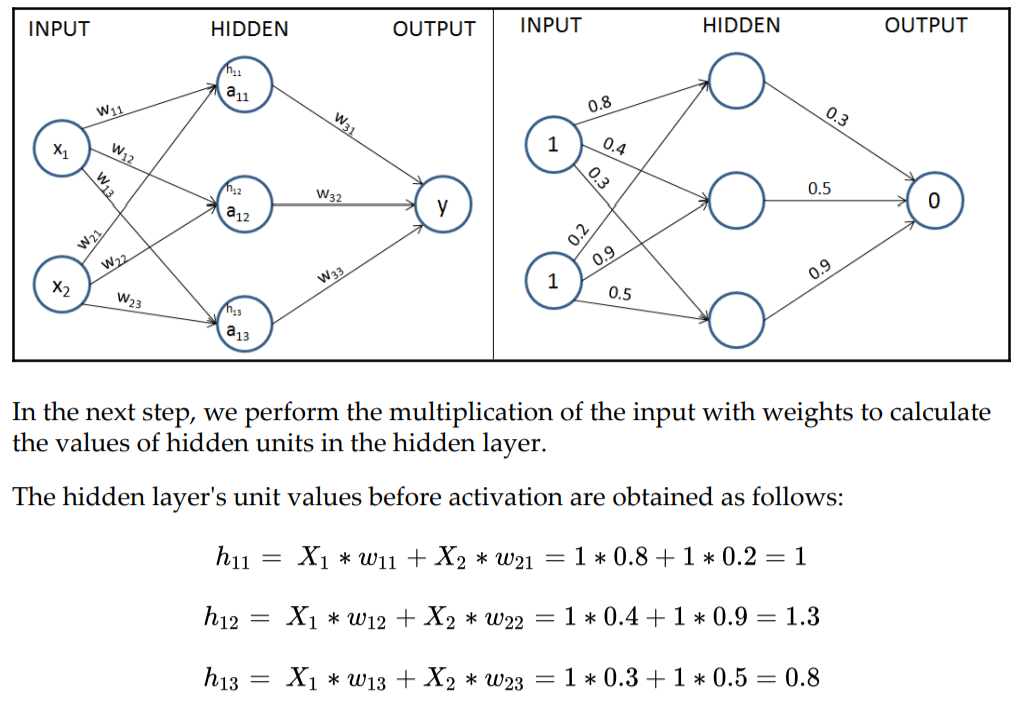

após isso temos a aplicação da função de ativação, nessa parte as funções de ativações ajudam a relações complexas entre os dados de entrada e saida, agora vamos ver algumas função de ativação.

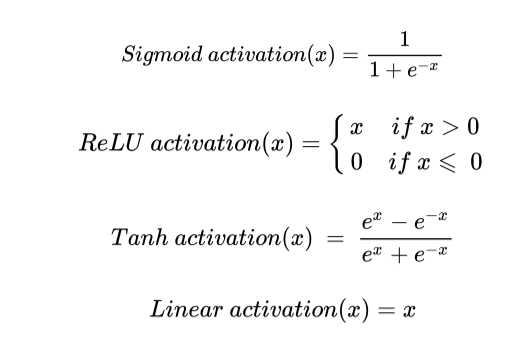

Agr vamos visualizar o gráfico dessas funções.
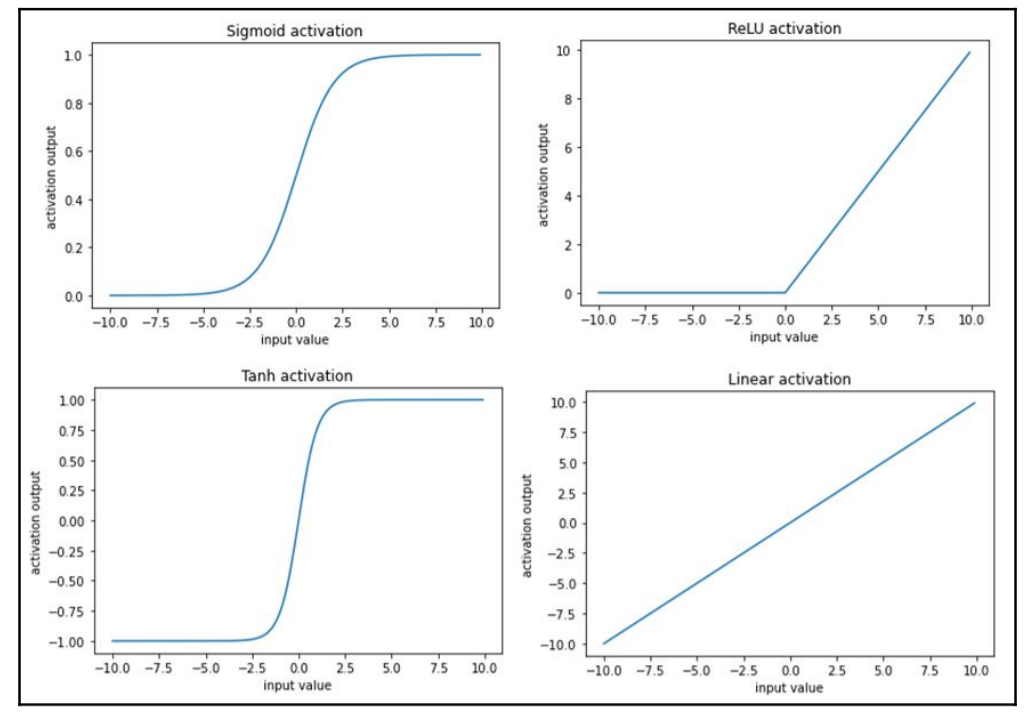

Nós temos 2 tipos de variaveis para realizar predições categoricas e continuas, para realizar essa predição nós fazemos os calculos de perda , no exemplo a seguir vamos usar uma variavel categorica para realizar a predição

####  Code

In [ ]:
import numpy as np 
from copy import deepcopy
import matplotlib.pyplot as plt
x = np.array([[1,1]])
y = np.array([[0]])

In [ ]:
def feed_forward(inputs,outputs,weights):
    #Calcular valores de camadas ocultas realizando a multiplicação de matrizes (np.dot) de entradas e valores de peso (weights[0]) conectando a entrada
    #camada para a camada oculta e adicione os termos de polarização (pesos[1]) associados com os nós da camada oculta
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    #Aplique a função de ativação sigmoid em cima dos valores da camada oculta obtidos na etapa anterior – pre_hidden:
    hidden = 1/(1+np.exp(-pre_hidden))
    #Calcule os valores da camada de saída realizando a multiplicação da matriz (np.dot) dos valores de ativação da camada oculta (ocultos) 
    #e pesos conectando a camada oculta à camada de saída (pesos[2]) e somando a saída com o viés associado ao nó em a camada de saída
    pre_out = np.dot(hidden,weights[2])+weights[3]
    #Calcule o valor do erro quadrático médio em todo o conjunto de dados e retorne o erro quadrático médio
    mean_squared_error = np.mean(np.square(pre_out - outputs))
    return mean_squared_error

In [ ]:
#Activations

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def relu(x):
    return np.where(x>0,x,0)

def linear(x):
    return x

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

In [ ]:
# Loss functions
def mse(p, y):
    return np.mean(np.square(p - y))

def mae(p, y):
    return np.mean(np.abs(p-y))

def binary_cross_entropy(p, y):
    return -np.mean((y*np.log(p)+(1-y)*np.log(1-p)))

def categorical_cross_entropy(p, y):
    return -np.mean(np.log(p[np.arange(len(y)),y]))


Backpropagation é uma tecnica de otimizaçãos dos pesos dos nos, que em seu background faz uso da tecnica de calculo que é a regra da cadeia.

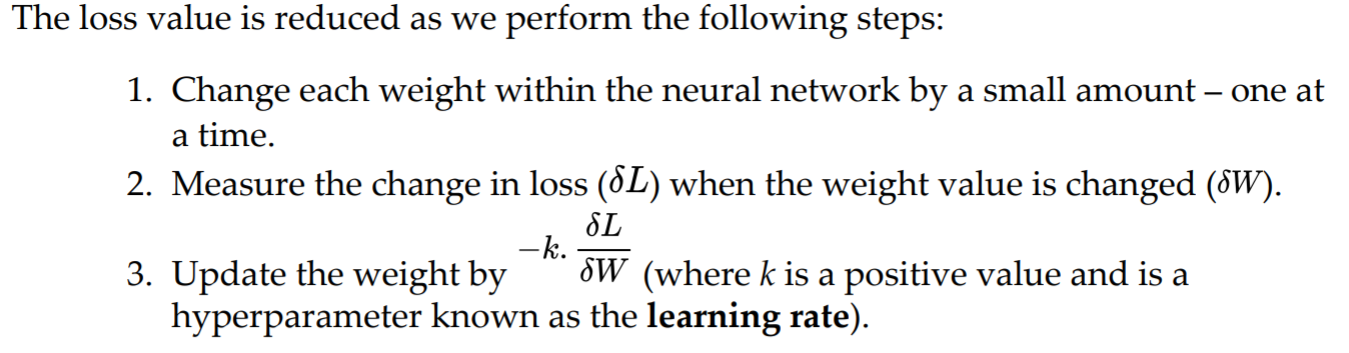





1.   Altere cada peso dentro da rede neural em uma pequena quantidade – um de cada vez.
2.   Meça a mudança na perda *img acima* quando o valor do peso é alterado *img acima*.
3.   Atualize o peso por *img acima* (onde k é um valor positivo e é um hiperparâmetro conhecido como taxa de aprendizado)




todo esse processo de atualização de pesos e redução de erros é chamado de gradiente descendente( gradient descent )

#### code

In [ ]:
def update_weight(inputs, outputs, weights, lr):
    # Primeiro fazemos a copia do pesos para as nossas 3 variavei a seguir
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    # Para calcular a nossa original_loss vamos usar nossa função feedforward
    original_loss = feed_forward(inputs,outputs,original_weights)
    # vamos percorrer todas nossas camadas
    for i, layer in enumerate(original_weights):
        #agr vamos fazer um loop por nossos parametros individualmente e pq nossas listas possuem shapes distintos
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index]+= 0.0001
            _loss_plus = feed_forward(inputs,outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [ ]:
def line():
    print("="*50)

In [ ]:
x = np.array([[1,1]]) 
y = np.array([[0]])  
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]
line()
print('Loss:'.upper())
print(feed_forward(x,y,W))
line()
print('Weights:'.upper())
[print(w) for w in W]
line()
print('Updated Weights:'.upper())
for epx in range(1):
    updated_weights = update_weight(x,y,W,1)
[print(w) for w in updated_weights];

se quiser calcular a regra da cadeia para chegar os valores segue o link
[regra da cadeia](https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-PyTorch/blob/master/Chapter01/Chain_rule.ipynb#scrollTo=3llIoQD7xMJf)

parei na pagina 47 do arquivo pdf e 32 do livro, revisar sobre derivadas e regra da cadeia

In [ ]:
def update_weights(inputs, outputs, weights, lr):
    # Primeiro fazemos a copia do pesos para as nossas 3 variavei a seguir
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    # Para calcular a nossa original_loss vamos usar nossa função feedforward
    original_loss = feed_forward(inputs,outputs,original_weights)
    # vamos percorrer todas nossas camadas
    for i, layer in enumerate(original_weights):
        #agr vamos fazer um loop por nossos parametros individualmente e pq nossas listas possuem shapes distintos
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index]+= 0.0001
            _loss_plus = feed_forward(inputs,outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights,original_loss

In [ ]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

In [ ]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [ ]:
W

In [ ]:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
out = np.dot(hidden,W[2]) + W[3]

In [ ]:
out

## CAP 02

### Pytorch Fundamentals

#### Inicializando tensores

Tensores são utilizados de muitas maneiras. Eles são a base das estruturas de dados para imagens , uma outra utilização é quando os tensores são iniciados com pesos diferentes das camadas das redes sociais.

In [ ]:
import torch

x = torch.tensor([[1,2]])
y = torch.tensor([[1],[2]])

print(x.shape)
print(y.shape)
line()
print(x.dtype)
print(y.dtype)

Todos os tensores precisam ser do mesmo tipo, assim se um tensor contem dados distintos como um booleano, um inteiro e um float), esses dados sofreram uma transformação para o mais generico tipo de dado.

In [ ]:
g = torch.tensor([False,1,2.0])
print(g)

Tensores, são alternativas similares ao Numpy, nos podemos inicializar os tensores usando as funções do objeto tensor. Note que um paralelo entre os tensores e os pesos de uma NN fica aparente agore, quando iniciamos tensores, para que eles representem os pesos de uma rede neural.

In [ ]:
# Gerando tensores de zeros com 3 linhas e 4 colunas
torch.zeros((3,4))

In [ ]:
# Gerando tensores de uns com 3 linhas e 4 colunas
torch.ones((3,4))

In [ ]:
# Gerando tensores com numero aleatorios entre 0 e 10, com 3 linhas e 4 colunas
torch.randint(low=0,high=10,size=(3,4))

In [ ]:
# Gerando tensores com  numeros aleatorios entre 0 e 1, com 3 linhas e 4 colunas
torch.rand(3,4)

In [ ]:
# Gerando tensores com  uma distribuição normal, com 3 linhas e 4 colunas
torch.randn((3,4))

In [ ]:
# convertendo de numpy para tensor
x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
print(type(x), type(y))

#### Operações com tensores

Similiar ao Numpy, você pode fazer varias performances de operações básicas com tensores. Paralelo as operações de uma NN as multiplicações de matrizes de entradas de dados, a adição do bias, e o repshaping dos inputs ou dos valores dos pesos quando requerido.


In [ ]:
#multiplicação por escalar
x = torch.tensor([[1,2,3,4,],[5,6,7,8]])
print(x*10)

In [ ]:
# adção por escalar
x = torch.tensor([[1,2,3,4],[5,6,7,8]])
y = x.add(10)
print(y)

In [ ]:
# reshaping
y = torch.tensor([2,3,1,0])
print(y.shape)
y = y.view(4,1)
print(y.shape)

outro meio de reshape é o metodo squeeze

In [ ]:
x = torch.randn(10,1,10)
z1 = torch.squeeze(x, 1) # similar to np.squeeze()
# The same operation can be directly performed on
# x by calling squeeze and the dimension to squeeze out
z2 = x.squeeze(1)
assert torch.all(z1 == z2) # all the elements in both tensors are equal
print('Squeeze:\n', x.shape, z1.shape)

In [ ]:
x = torch.randn(10,10)
print(x.shape)
# torch.size(10,10)
z1 = x.unsqueeze(0)
print(z1.shape)
# torch.size(1,10,10)
# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim at the
# specified axis
x = torch.randn(10,10)
z2, z3, z4 = x[None], x[:,None], x[:,:,None]
print(z2.shape, z3.shape, z4.shape)

In [ ]:
# Multiplicação de Matriz

x = torch.tensor([[1,2,3,4],[5,6,7,8]])
print(torch.matmul(x,y))

In [ ]:
# uma alternativa para multiplicação de matrizes é o operador @
print(x@y)

similar ao metodo do numpy *concatenate*, podemos usar o concatenation de tensores usando o metedo cat

In [ ]:

x = torch.randn(10,10,10)
z = torch.cat([x,x], axis=0) # np.concatenate()
print('Cat axis 0:', x.shape, z.shape)
# Cat axis 0:  torch.Size([10, 10, 10]) torch.Size([20, 10, 10])
z = torch.cat([x,x], axis=1) # np.concatenate()
print('Cat axis 1:', x.shape, z.shape)
# Cat axis 1: torch.Size([10, 10, 10]) torch.Size([10, 20, 10])

pegando o maximo de um tensor

In [ ]:
x = torch.arange(25).reshape(5,5)
print('Max:', x.shape, x.max()) 

In [ ]:
x.max(dim=0)

In [ ]:
m, argm = x.max(dim=1) 
print('Max in axis 1:\n', m, argm) 

permutação com tensores

In [ ]:
x = torch.randn(10,20,30)
z = x.permute(2,0,1) # np.permute()
print('Permute dimensions:', x.shape, z.shape)

###  FAZENDO SUA REDE NEURAL

In [ ]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [ ]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [ ]:
import torch.nn as nn

In [ ]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [ ]:
mynet = MyNeuralNet().to(device)

In [ ]:
loss_func = nn.MSELoss()

In [ ]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

In [ ]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [ ]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.detach().numpy())

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

#### Dataset, Dataloader e batch size


In [ ]:
# importação dos metodos
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [ ]:
# importando os dados, converta-os para floats e registre os mesmo na memoria
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

# convertendo para float
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

# colocando os dados na memoria da gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X= X.to(device)
Y = Y.to(device)

In [ ]:
class MyDataset(Dataset):
    def __init__(self,x,y): #construtor da clase
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    
    def __len__(self): # retorna o tamanho do dados
        return len(self.x)

    def __getitem__(self,ix): # pega a posição indicada no argumento ix
        return self.x[ix], self.y[ix]


instanciando o objeto myDataset e passando esse objeto para a classe importada do torch utils DataLoader, nela vamos selecionar o batch_size numero de data points para o input original e o objeto de tensores de output

In [ ]:
# instanciando a clase
ds = MyDataset(X,Y)

dl = DataLoader(ds, batch_size=2, shuffle=True)

In [ ]:
for x,y in dl:
    print(x,y)

In [ ]:
# Redefinindo a rede neural da seção anterior
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__() #construror
        self.input_to_hidden_layer = nn.Linear(2,8) # camda de entrada
        self.hidden_layer_activation = nn.ReLU() # camda de ativação
        self.hidden_to_output_layer = nn.Linear(8,1) # camadad e saida 
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [ ]:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [ ]:
import time
loss_history = []
start = time.time()
for _ in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
        loss_history.append(loss_value)
end = time.time()
print(end - start)

# Seção 2

continuar na pagina 174